# **Concepts Covered:**

- <a href = #link4>Hypothesis Test for Population Mean $\mu$</a>
- <a href = #link5>One-tailed and Two-tailed Tests</a>

## Command to install the latest version Scipy in the system

In [3]:
!pip install scipy==1.6.1

  Using cached scipy-1.6.1.tar.gz (27.3 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  × Building wheel for scipy (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [1153 lines of output]
      setup.py:563: DeprecationWarning:
      
        `numpy.distutils` is deprecated since NumPy 1.23.0, as a result
        of the deprecation of `distutils` itself. It will be removed for
        Python >= 3.12. For older Python versions it will remain present.
        It is recommended to use `setuptools < 60.0` for those Python versions.
        For more details, see:
          https://numpy.org/devdocs/reference/distutils_status_migration.html
      
      
        from numpy.distutils.core import setup
      Running from SciPy source directory.
      INFO: lapack_opt_info:
      INFO: lapack_armpl_info:
      INFO: customize UnixCCompiler
      I

In [1]:
import scipy
scipy.__version__

'1.15.2'

## Import the required packages

In [2]:
# import the important packages
import pandas as pd  # library used for data manipulation and analysis
import numpy as np  # library used for working with arrays
import matplotlib.pyplot as plt  # library for plots and visualizations
import seaborn as sns  # library for visualizations

%matplotlib inline

import scipy.stats as stats  # this library contains a large number of probability distributions as well as a growing library of statistical functions

## **Hypothesis Test for Population Mean**

### One Sample Z-test (when population standard deviation is known)

It is rarely the case when you know the population standard deviation and not the mean but let's assume that is the case.

It is known from experience that for a certain E-commerce company the mean delivery time of the products is 5 days with a standard deviation of 1.3 days.

The new customer service manager of the company is afraid that the company is slipping and collects a random sample of 45 orders. The mean delivery time of these samples comes out to be 5.25 days. 

Is there enough statistical evidence for the manager’s apprehension that the mean delivery time of products is greater than 5 days?

Use level of significance $\alpha$ = 0.05.

### Let's write the null hypothesis and alternate hypothesis

Let $\mu$ be the mean delivery time of the products.

The manager will test the null hypothesis

>$H_0: \mu = 5$

against the alternate hypothesis

> $H_a: \mu > 5$

### Are the assumptions of the Z-test satisfied?

* Samples are drawn from a normal distribution - Since the sample size is 45(which is > 30), Central Limit Theorem states that the distribution of sample means will be normal. If the sample size was less than 30, we would have been able to apply the z test if we knew that the population distribution was normal.  
* Observations are from a simple random sample - we are informed that the manager collected a simple random sample.
* Standard deviation is known - Yes.


Voila! We can use Z-test for this problem.

### The next step is to find the Z test statistic

In [3]:
# set the values of population mean and population standard deviation to 5 and 1.3 respectively
mu, sigma = 5, 1.3

# set the value of sample mean to 5.25
x_bar = 5.25

# calculate the test statistic
test_stat = (x_bar - mu) / (sigma/np.sqrt(45))
test_stat

1.2900392177883402

#### The Z test statistic follows a standard normal distribution.

Let's plot the distribution of the Z test statistic and see where the computed test statistic lies in the plot.

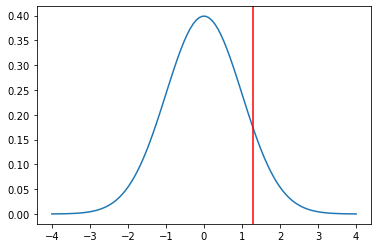

In [4]:
# import the required function
from scipy.stats import norm

# plotting the distribution of Z test statistic along with the test statistic
# we are plotting the distributions here to better visualize the calculations
x = np.linspace(-4, 4, 100)
plt.plot(x, norm.pdf(x, 0, 1))
plt.axvline(x = test_stat, c = 'r')
plt.show()

What is the probability of getting the calculated value of test statistic or bigger in the above distribution?

In [5]:
1 - norm.cdf(test_stat)

0.09851852092578695

**Though the probability is very small, is it significant enough to reject the null hypothesis in favor of the alternate hypothesis?**

### Introduction of Rejection Acceptance Region/ p-value

Though the probability is small, we can not conclude whether the evidence is significant enough to reject the null hypothesis in favor of the alternate hypothesis or not. To determine it, we use either one of the following approaches:

1- Rejection region approach

2- p-value approach

#### Rejection Region Approach

For this approach, we need to follow the below steps.


1.   We choose a value of the level of significance ($\alpha$).

     ($\alpha$ is the probability of rejecting the null hypothesis if it is true.)

2.   Then, we find the rejection region in the graph.

3.   We reject the null hypothesis if the test statistic falls in the rejection region. Else, we don't reject the null hypothesis.

In the given example, the Z test statistic follows a standard normal distribution as shown in the above plot. The Z values lying at the right end of the distribution give strong evidence against the null hypothesis. To find the rejection region, we will find the value of Z (called critical value) that gives an area of $\alpha$ to the right end.

In [6]:
# import the required function
from scipy.stats import norm

# find the critical value
critical_val = norm.ppf(1-.05)
critical_val

1.6448536269514722

The critical value separates the region where we will reject the null hypothesis from the region where we won't reject the null hypothesis. See the below plot.

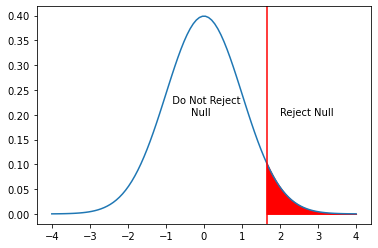

In [7]:
# plotting the test statistic distribution and indicating the rejection and acceptance region
# we are plotting the distributions here to better visualize the calculations
x = np.linspace(-4, 4, 100)
plt.plot(x, norm.pdf(x, 0, 1))
plt.axvline(x = critical_val, c = 'r')
x1 = np.linspace(critical_val, 4, 50)
plt.fill_between(x1, norm.pdf(x1, 0, 1), color='r')
plt.annotate('Reject Null', (2, 0.20))
plt.annotate('  Do Not Reject\n        Null', (-1, 0.20))
plt.show()

### Insight

As our test statistic (~ 1.29) does not lie in the rejection region, we can not reject the null hypothesis. Thus, we do not have enough statistical evidence to say that the mean delivery time of a product is greater than 5 days.

#### p-value Approach

Though the rejection region approach gives us the desired conclusion, it does not say anything about the strength of the evidence. Hence, statisticians prefer the p-value approach which measures the strength of the evidence against the null hypothesis.

For this approach, we need to follow the below steps.

1. We choose the level of significance ($\alpha$).

2. Then, we calculate the p-value.

3. We reject the null hypothesis if the p-value $\leq \alpha$. Else, we fail to reject the null hypothesis.

The p-value is the probability of finding the observed test statistic or more extreme results, under the null hypothesis. 

In the given example, the p-value is the area right to the test statistic under the standard normal curve.


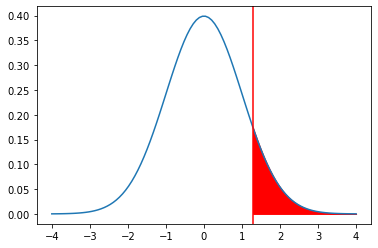

In [8]:
# plotting the test statistic distribution along with computed test statistic
# we are plotting the distributions here to better visualize the calculations
x = np.linspace(-4, 4, 100)
plt.plot(x, norm.pdf(x, 0, 1))
plt.axvline(x = test_stat, c = 'r')
x1 = np.linspace(test_stat, 4, 50)
plt.fill_between(x1, norm.pdf(x1, 0, 1), color='r')
plt.show()

In [9]:
# calculate the p-value
1 - norm.cdf(test_stat)

0.09851852092578695

### Insight

As the p-value ~0.098 is greater than the level of significance, we can not reject the null hypothesis. Thus, we do not have enough statistical evidence to say that the mean delivery time of a product is greater than 5 days.

### Key Takeaway

* We get the same result by using both the Rejection Region and p-value approach that the manager does not have enough statistical evidence to say that the mean delivery time of a product is greater than 5 days.

## **One-tailed and Two-tailed Tests**

### Let's see an example

Suppose a soft-drink manufacturer's most selling product is 600 ml coke with a standard deviation of 50 ml.

A customer would like to test whether there is at least 600 ml of coke in the bottle. He doubts that the amount of coke in the bottle is less than 600 ml.

The null hypothesis formed by the customer is

>$H_0: \mu = 600$

against the alternative hypothesis

> $H_a: \mu < 600$

However, the quality control team wants exactly 600 ml of coke in the bottle. The team wants to ensure that the amount of coke in the bottle is not different from 600 ml.

The null hypothesis formed by the quality control team is

>$H_0: \mu = 600$

against the alternative hypothesis

> $H_a: \mu \neq 600$

Thus, the choice of a one-sided vs two-sided alternative hypothesis depends on the nature of the problem.

### Two-tailed Test Example

Suppose you work on the quality control team of the company. It is known from experience that the mean amount of coke in a bottle is 600 ml with a standard deviation of 50 ml.

You have collected 36 randomly sampled bottles. The mean amount of coke in the 36 samples is 580 ml.

You intend to test whether the amount of coke in the bottle is different from 600 ml using a 0.05 level of significance. Do you have enough Statistical evidence for it?

### Are the assumptions of Z-test satisfied?

*   Samples are drawn from a normal distribution - Since the sample size is 36(which is > 30), Central Limit Theorem states that the distribution of sample means will be normal. If the sample size was less than 30, we would have been able to apply the Z test if we knew that the population distribution was normal.  
*   Observations are from a simple random sample - we are informed that you have collected a simple random sample.
*   Standard deviation is known - Yes.


Voila! We can use Z-test for this problem.

### The next step is to find the test statistic

In [10]:
# set the values of population mean and standard deviation to 600 and 50 respectively.
mu, sigma = 600, 50

# set the value of sample mean to 580.
x_bar = 580

# calculate the test statistic.
test_stat = (x_bar - mu) / (sigma/np.sqrt(36))
test_stat

-2.4

### Let's use the rejection region approach for the two-tailed test

In the given example, the Z test statistic follows a standard normal distribution. The Z values lying at the left and right end of the distribution give strong evidence against the null hypothesis. To find the rejection region, we will find the values of Z (called critical values) that give an area of $\alpha/2$ to both the left and right end.

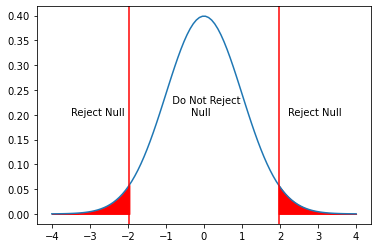

In [11]:
# import the required function
from scipy.stats import norm

# find the critical values
critical_val1 = norm.ppf(1-(0.05/2))
critical_val2 = norm.ppf(0.05/2)

# plot the rejection and acceptance region
# we are plotting the distributions here to better visualize the calculations
x = np.linspace(-4, 4, 100)
plt.plot(x, norm.pdf(x, 0, 1))
plt.axvline(x = critical_val1, c = 'r')
x1 = np.linspace(critical_val1, 4, 50)
plt.fill_between(x1, norm.pdf(x1, 0, 1), color='r')
plt.axvline(x = critical_val2, c = 'r')
x1 = np.linspace(-4, critical_val2, 50)
plt.fill_between(x1, norm.pdf(x1, 0, 1), color='r')
plt.annotate('Reject Null', (2.2, 0.20))
plt.annotate('Reject Null', (-3.5, 0.20))
plt.annotate('  Do Not Reject\n        Null', (-1, 0.20))
plt.show()

As our test statistic (~-2.4) lies in the rejection region, we can reject the null hypothesis. Thus, we have enough statistical evidence to say that the amount of coke in the bottle is different from 600 ml.

### One-tailed Test Example

It is known that the mean amount of coke in a bottle is 600 ml with a standard deviation of 50 ml. Suppose you are a customer who wants to test whether the amount of coke in the bottle is less than 600 ml.

You have collected 36 randomly sampled bottles. The mean amount of coke in the 36 samples is 580 ml.

Do you have enough Statistical evidence for it?

### Are the assumptions of the Z-test satisfied?
*   Samples are drawn from a normal distribution - Since the sample size is 36(which is > 30), Central Limit Theorem states that the distribution of sample means will be normal. If the sample size was less than 30, we would have been able to apply the Z test if we knew that the population distribution was normal.  
*   Observations are from a simple random sample - we are informed that you have collected a simple random sample.
*   Standard deviation is known - Yes


Voila! We can use Z-test for this problem.

### The next step is to find the test statistic

In [12]:
# set the values of population mean and standard deviation to 600 and 50 respectively
mu, sigma = 600, 50

# set the value of sample mean to 580
x_bar = 580

# calculate the test statistic
test_stat = (x_bar - mu) / (sigma/np.sqrt(36))
test_stat

-2.4

### Let's use the rejection region approach for the one-tailed test

In the given example, the Z test statistic follows a standard normal distribution. The Z values lying at the left end of the distribution give strong evidence against the null hypothesis. To find the rejection region, we will find the value of Z (called critical value) that gives an area of $\alpha$ to the left end.

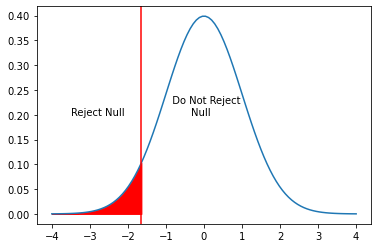

In [13]:
# import the required function
from scipy.stats import norm

# find the critical value
critical_val = norm.ppf(0.05)

# plot the rejection and acceptance region
# we are plotting the distributions here to better visualize the calculations
x = np.linspace(-4, 4, 100)
plt.plot(x, norm.pdf(x, 0, 1))
plt.axvline(x = critical_val, c = 'r')
x1 = np.linspace(-4, critical_val, 50)
plt.fill_between(x1, norm.pdf(x1, 0, 1), color='r')
plt.annotate('Reject Null', (-3.5, 0.20))
plt.annotate('  Do Not Reject\n        Null', (-1, 0.20))
plt.show()

As our test statistic (~-2.4) lies in the rejection region, we can reject the null hypothesis. Thus, we have enough statistical evidence to say that the amount of coke in the bottle is less than 600 ml.

### Key Takeaways

* In the one-tailed test, we consider the difference only in one direction. However, in the two-tailed test, we are interested to know the direction of the difference. 
* Depending on the nature of the problem choose one!